In [46]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from skrebate import ReliefF
import xgboost as xgb
import os
from itertools import combinations
from scipy.special import comb
from deap import base, creator, tools, algorithms
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt # Standard python libraries for data and visualisation

# SciKit Learn a python ML Library
# Import models
import sklearn
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error # Import error metric

# Import data munging tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import bernoulli
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

random.seed(42) # set the random seed for reproducibility
np.random.seed(42) # fix the randomness numbers for the reproducibility


In [47]:
# download production data file
csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Production Data/Cement/cemex/cemex_csv_file/cemex_quarter_report_up_to_2024_version_1.csv' 
production_df = pd.read_csv(csv_file)

# download general index data
S_P_500_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/S_P_500.csv'
Russell_2000_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Russell_2000.csv'
NASDAQ_Composite_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/NASDAQ_Composite.csv'
Dow_jones_industrial_average_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Dow_jones_industrial_average.csv'

S_P_500_df = pd.read_csv(S_P_500_csv_file)
Russell_2000_df = pd.read_csv(Russell_2000_csv_file)
NASDAQ_Composite_df = pd.read_csv(NASDAQ_Composite_csv_file)
Dow_jones_industrial_average_df = pd.read_csv(Dow_jones_industrial_average_csv_file)

# download market index future
Nasdaq_100_Sep_24_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Nasdaq_100_Sep_24.csv'
E_mini_Russell_2000_Index_Future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/E_mini_Russell_2000_Index_Future.csv'
E_Mini_S_P_500_Sep_24_Future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/E_Mini_S_P_500_Sep_24_Future.csv'
Mini_Dow_Jones_Indus_future_Sep_24_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Mini_Dow_Jones_Indus_future_Sep_24.csv'
US_Treasury_Bond_Futures_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/US_Treasury_Bond_Futures.csv'

Nasdaq_100_Sep_24_df = pd.read_csv(Nasdaq_100_Sep_24_csv_file)
E_mini_Russell_2000_Index_Future_df = pd.read_csv(E_mini_Russell_2000_Index_Future_csv_file) # 2017-07-10
E_Mini_S_P_500_Sep_24_Future_df = pd.read_csv(E_Mini_S_P_500_Sep_24_Future_csv_file) # 2000-09-18
Mini_Dow_Jones_Indus_future_Sep_24_df = pd.read_csv(Mini_Dow_Jones_Indus_future_Sep_24_csv_file) # 2002-04-05
US_Treasury_Bond_Futures_df = pd.read_csv(US_Treasury_Bond_Futures_csv_file) # 2000-09-21

# download energy futures
oil_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Crude_Oil_Jul_24.csv'
brent_oil_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Brent Crude Oil Last Day Financ.csv'
Copper_Sep_24_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Copper_Sep_24.csv'
Corn_Futures_Dec_2024_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Corn_Futures_Dec_2024_future.csv'
Cotton_Oct_24_Futures_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Cotton_Oct_24_Futures.csv'
Sugar_Futures_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Sugar_Futures.csv'
Soybean_Oil_Futures_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Soybean_Oil_Futures_future.csv'
Soybean_Futures_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Soybean_Futures_future.csv'
silver_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/silver_future.csv'
RBOB_Gasoline_Aug_24_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/RBOB_Gasoline_Aug_24_future.csv'
Platinum_Oct_24_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Platinum_Oct_24_future.csv'
Palladium_Sep_24_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Palladium_Sep_24_future.csv'
Orange_Juice_Sep_24_Futures_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Orange_Juice_Sep_24_Futures.csv'
Natural_Gas_Aug_24_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Natural_Gas_Aug_24.csv'
Heating_Oil_Aug_24_future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Heating_Oil_Aug_24_future.csv'
Gold_Aug_24_Future_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Gold_Aug_24_Future.csv'

oil_csv_df = pd.read_csv(oil_csv_file)
brent_oil_future_df = pd.read_csv(brent_oil_csv_file)
Copper_Sep_24_df = pd.read_csv(Copper_Sep_24_csv_file)
Corn_Futures_Dec_2024_future_df = pd.read_csv(Corn_Futures_Dec_2024_future_csv_file)
Cotton_Oct_24_Futures_df = pd.read_csv(Cotton_Oct_24_Futures_csv_file)
Sugar_Futures_df = pd.read_csv(Sugar_Futures_csv_file)
Soybean_Oil_Futures_future_df = pd.read_csv(Soybean_Oil_Futures_future_csv_file)
Soybean_Futures_future_df = pd.read_csv(Soybean_Futures_future_csv_file)
silver_future_df = pd.read_csv(silver_future_csv_file)
RBOB_Gasoline_Aug_24_future_df = pd.read_csv(RBOB_Gasoline_Aug_24_future_csv_file)
Platinum_Oct_24_future_df = pd.read_csv(Platinum_Oct_24_future_csv_file)
Palladium_Sep_24_future_df = pd.read_csv(Palladium_Sep_24_future_csv_file)
Orange_Juice_Sep_24_Futures_df = pd.read_csv(Orange_Juice_Sep_24_Futures_csv_file)
Natural_Gas_Aug_24_df = pd.read_csv(Natural_Gas_Aug_24_csv_file)
Heating_Oil_Aug_24_future_df = pd.read_csv(Heating_Oil_Aug_24_future_csv_file)
Gold_Aug_24_Future_df = pd.read_csv(Gold_Aug_24_Future_csv_file)

# download etf futures


# download energy etf
Alerian_MLP_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/Alerian_MLP_ETF.csv'
Fidelity_MSCI_Energy_Index_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/Fidelity_MSCI_Energy_Index_ETF.csv'
First_Trust_North_American_Energy_Infrastructure_Fund_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/First_Trust_North_American_Energy_Infrastructure_Fund_ETF.csv'
Global_X_MLP_Energy_Infrastructure_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/Global_X_MLP_Energy_Infrastructure_ETF.csv'
Global_X_MLP_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/Global_X_MLP_ETF.csv'
iShares_Global_Clean_Energy_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/iShares_Global_Clean_Energy_ETF.csv'
iShares_Global_Energy_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/iShares_Global_Energy_ETF.csv'
MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs.csv'
SPDR_S_P_Oil_Gas_Exploration_Production_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/SPDR_S_P_Oil_Gas_Exploration_Production_ETF.csv'
The_Energy_Select_Sector_SPDR_Fund_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/The_Energy_Select_Sector_SPDR_Fund_ETF.csv'
VanEck_Oil_Services_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/VanEck_Oil_Services_ETF.csv'
Vanguard_Energy_Index_Fund_ETF_Shares_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/Energy ETF/Vanguard_Energy_Index_Fund_ETF_Shares_ETF.csv'

Alerian_MLP_ETF_df = pd.read_csv(Alerian_MLP_ETF_csv_file)
Fidelity_MSCI_Energy_Index_ETF_df = pd.read_csv(Fidelity_MSCI_Energy_Index_ETF_csv_file)
First_Trust_North_American_Energy_Infrastructure_Fund_ETF_df = pd.read_csv(First_Trust_North_American_Energy_Infrastructure_Fund_ETF_csv_file)
Global_X_MLP_Energy_Infrastructure_ETF_df = pd.read_csv(Global_X_MLP_Energy_Infrastructure_ETF_csv_file)
Global_X_MLP_ETF_df = pd.read_csv(Global_X_MLP_ETF_csv_file)
iShares_Global_Clean_Energy_ETF_df = pd.read_csv(iShares_Global_Clean_Energy_ETF_csv_file)
MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_df = pd.read_csv(MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_csv_file)
SPDR_S_P_Oil_Gas_Exploration_Production_ETF_df = pd.read_csv(SPDR_S_P_Oil_Gas_Exploration_Production_ETF_csv_file)
The_Energy_Select_Sector_SPDR_Fund_ETF_df = pd.read_csv(The_Energy_Select_Sector_SPDR_Fund_ETF_csv_file)
VanEck_Oil_Services_ETF_df = pd.read_csv(VanEck_Oil_Services_ETF_csv_file)
Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df = pd.read_csv(Vanguard_Energy_Index_Fund_ETF_Shares_ETF_csv_file)


# download real estate etf
Dimensional_Global_Real_Estate_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Dimensional_Global_Real_Estate_ETF.csv'
Dimensional_US_Real_Estate_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Dimensional_US_Real_Estate_ETF.csv'
Fidelity_MSCI_Real_Estate_Index_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Fidelity_MSCI_Real_Estate_Index_ETF.csv'
Invesco_Active_US_Real_Estate_Fund_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Invesco_Active_US_Real_Estate_Fund_ETF.csv'
iShares_Cohen_Steers_REIT_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/iShares_Cohen_Steers_REIT_ETF.csv'

iShares_Residential_and_Multisector_Real_Estate_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/iShares_Residential_and_Multisector_Real_Estate_ETF.csv'
iShares_Trust_iShares_Core_US_REIT_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/iShares_Trust_iShares_Core_US_REIT_ETF.csv'
iShares_U_S_Real_Estate_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/iShares_U_S_Real_Estate_ETF.csv'
JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/JPMorgan_BetaBuilders_MSCI_US_REIT_ETF.csv'

Vanguard_Real_Estate_Index_Fund_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Vanguard_Real_Estate_Index_Fund_ETF.csv'
Schwab_U_S_REIT_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Schwab_U_S_REIT_ETF.csv'
The_Real_Estate_Select_Sector_SPDR_Fund_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/The_Real_Estate_Select_Sector_SPDR_Fund_ETF.csv'
SPDR_Dow_Jones_REIT_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/SPDR_Dow_Jones_REIT_ETF.csv'

Dimensional_Global_Real_Estate_ETF_df = pd.read_csv(Dimensional_Global_Real_Estate_ETF_csv_file)
Dimensional_US_Real_Estate_ETF_df = pd.read_csv(Dimensional_US_Real_Estate_ETF_csv_file)
Fidelity_MSCI_Real_Estate_Index_ETF_df = pd.read_csv(Fidelity_MSCI_Real_Estate_Index_ETF_csv_file)
Invesco_Active_US_Real_Estate_Fund_ETF_df = pd.read_csv(Invesco_Active_US_Real_Estate_Fund_ETF_csv_file)
iShares_Cohen_Steers_REIT_ETF_df = pd.read_csv(iShares_Cohen_Steers_REIT_ETF_csv_file)
iShares_Residential_and_Multisector_Real_Estate_ETF_df = pd.read_csv(iShares_Residential_and_Multisector_Real_Estate_ETF_csv_file)
iShares_Trust_iShares_Core_US_REIT_ETF_df = pd.read_csv(iShares_Trust_iShares_Core_US_REIT_ETF_csv_file)
iShares_U_S_Real_Estate_ETF_df = pd.read_csv(iShares_U_S_Real_Estate_ETF_csv_file)
JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_df = pd.read_csv(JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_csv_file)
Vanguard_Real_Estate_Index_Fund_ETF_df = pd.read_csv(Vanguard_Real_Estate_Index_Fund_ETF_csv_file)
Schwab_U_S_REIT_ETF_df = pd.read_csv(Schwab_U_S_REIT_ETF_csv_file)
The_Real_Estate_Select_Sector_SPDR_Fund_ETF_df = pd.read_csv(The_Real_Estate_Select_Sector_SPDR_Fund_ETF_csv_file)
SPDR_Dow_Jones_REIT_ETF_df = pd.read_csv(SPDR_Dow_Jones_REIT_ETF_csv_file)

# other related etf
VanEck_Steel_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/VanEck_Steel_ETF.csv'
First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF.csv'
Invesco_Russell_2000_Dynamic_Multifactor_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Invesco_Russell_2000_Dynamic_Multifactor_ETF.csv'
Invesco_S_P_SmallCap_Value_with_Momentum_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/Invesco_S_P_SmallCap_Value_with_Momentum_ETF.csv'
iShares_MSCI_South_Africa_ETF_csv_file = '/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/Cemax/ETF/iShares_MSCI_South_Africa_ETF.csv'

VanEck_Steel_ETF_df = pd.read_csv(VanEck_Steel_ETF_csv_file)
First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_df = pd.read_csv(First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_csv_file)
Invesco_Russell_2000_Dynamic_Multifactor_ETF_df = pd.read_csv(Invesco_Russell_2000_Dynamic_Multifactor_ETF_csv_file)
Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df = pd.read_csv(Invesco_S_P_SmallCap_Value_with_Momentum_ETF_csv_file)
iShares_MSCI_South_Africa_ETF_df = pd.read_csv(iShares_MSCI_South_Africa_ETF_csv_file)

In [48]:
# Read the CSV file
carbon_future_csv_file = "/Users/shiliurui/Desktop/2024 DSML MSc Project/Equity Data/carbon/Carbon Emissions Futures Historical Data.csv"
carbon_future_df = pd.read_csv(carbon_future_csv_file)

# Convert the "Date" column to datetime format
carbon_future_df['Date'] = pd.to_datetime(carbon_future_df['Date'], format='%m/%d/%Y')

# Rename the "Price" column to "Adj Close"
carbon_future_df.rename(columns={"Price": "Adj Close"}, inplace=True)

# Sort the DataFrame by the "Date" column in ascending order
carbon_future_df = carbon_future_df.sort_values(by='Date')

# Reset the index after sorting
carbon_future_df.reset_index(drop=True, inplace=True)

# Display the DataFrame to verify the changes
print(carbon_future_df)

           Date  Adj Close   Open   High    Low    Vol. Change %
0    2005-04-25      17.55  17.55  17.55  17.55     NaN    3.54%
1    2005-04-26      17.20  17.20  17.20  17.20     NaN   -1.99%
2    2005-04-27      16.45  16.45  16.45  16.45     NaN   -4.36%
3    2005-04-28      16.00  16.00  16.00  16.00     NaN   -2.74%
4    2005-04-29      16.50  16.50  16.50  16.50     NaN    3.13%
...         ...        ...    ...    ...    ...     ...      ...
4985 2024-07-16      67.94  67.85  68.27  67.16  18.32K    0.53%
4986 2024-07-17      66.42  68.01  68.13  66.41  19.67K   -2.24%
4987 2024-07-18      66.11  66.43  66.98  66.01  17.93K   -0.47%
4988 2024-07-19      66.00  66.35  67.49  65.73  15.46K   -0.17%
4989 2024-07-22      64.79  66.28  66.73  64.25  25.44K   -1.83%

[4990 rows x 7 columns]


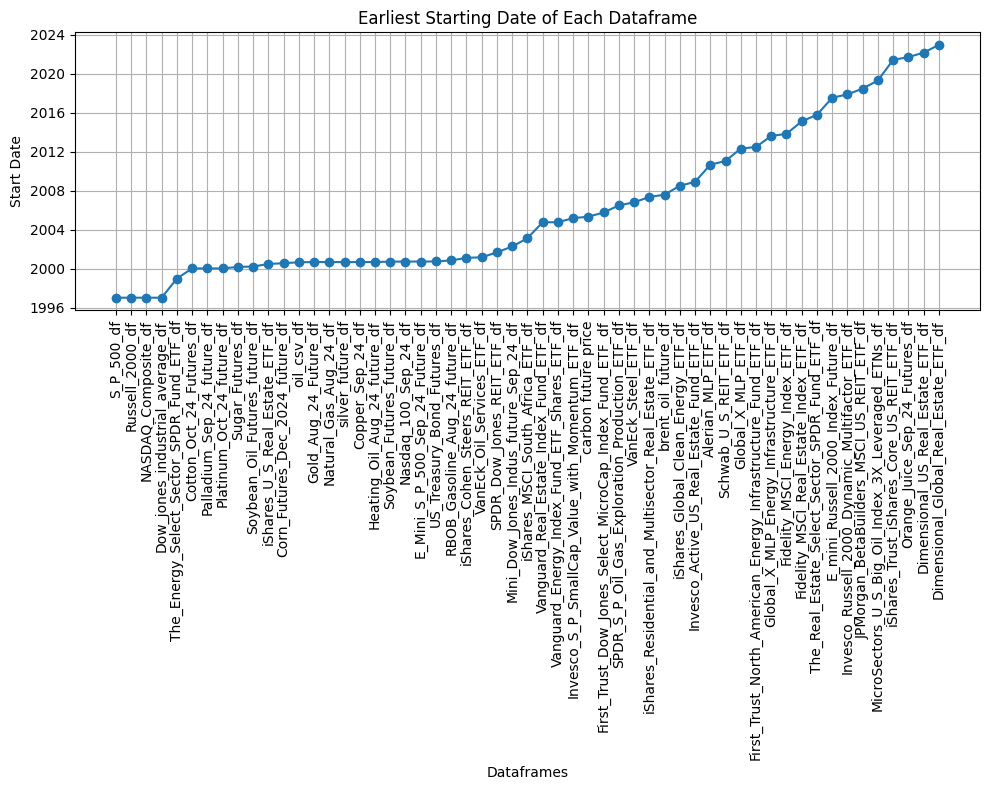

                                    Dataframe Start Date
0                                  S_P_500_df 1997-01-02
1                             Russell_2000_df 1997-01-02
2                         NASDAQ_Composite_df 1997-01-02
3             Dow_jones_industrial_average_df 1997-01-02
4                        Nasdaq_100_Sep_24_df 2000-09-18
5             E_Mini_S_P_500_Sep_24_Future_df 2000-09-18
6                 US_Treasury_Bond_Futures_df 2000-09-21
7                                  oil_csv_df 2000-08-23
8                            Copper_Sep_24_df 2000-08-30
9             Corn_Futures_Dec_2024_future_df 2000-07-17
10                   Cotton_Oct_24_Futures_df 2000-01-03
11                           Sugar_Futures_df 2000-03-01
12              Soybean_Oil_Futures_future_df 2000-03-15
13                  Soybean_Futures_future_df 2000-09-15
14                           silver_future_df 2000-08-30
15             RBOB_Gasoline_Aug_24_future_df 2000-11-01
16                  Platinum_Oc

In [49]:
# Dictionary of dataframes with their variable names
dfs = {
    'S_P_500_df': S_P_500_df,
    'Russell_2000_df': Russell_2000_df, 'NASDAQ_Composite_df': NASDAQ_Composite_df,
    'Dow_jones_industrial_average_df': Dow_jones_industrial_average_df, 'Nasdaq_100_Sep_24_df': Nasdaq_100_Sep_24_df,
    'E_mini_Russell_2000_Index_Future_df': E_mini_Russell_2000_Index_Future_df, 'E_Mini_S_P_500_Sep_24_Future_df': E_Mini_S_P_500_Sep_24_Future_df,
    'Mini_Dow_Jones_Indus_future_Sep_24_df': Mini_Dow_Jones_Indus_future_Sep_24_df, 'US_Treasury_Bond_Futures_df': US_Treasury_Bond_Futures_df,
    'oil_csv_df': oil_csv_df, 'brent_oil_future_df': brent_oil_future_df, 'Copper_Sep_24_df': Copper_Sep_24_df,
    'Corn_Futures_Dec_2024_future_df': Corn_Futures_Dec_2024_future_df, 'Cotton_Oct_24_Futures_df': Cotton_Oct_24_Futures_df,
    'Sugar_Futures_df': Sugar_Futures_df, 'Soybean_Oil_Futures_future_df': Soybean_Oil_Futures_future_df,
    'Soybean_Futures_future_df': Soybean_Futures_future_df, 'silver_future_df': silver_future_df,
    'RBOB_Gasoline_Aug_24_future_df': RBOB_Gasoline_Aug_24_future_df, 'Platinum_Oct_24_future_df': Platinum_Oct_24_future_df,
    'Palladium_Sep_24_future_df': Palladium_Sep_24_future_df, 'Orange_Juice_Sep_24_Futures_df': Orange_Juice_Sep_24_Futures_df,
    'Natural_Gas_Aug_24_df': Natural_Gas_Aug_24_df, 'Heating_Oil_Aug_24_future_df': Heating_Oil_Aug_24_future_df,
    'Gold_Aug_24_Future_df': Gold_Aug_24_Future_df, 'Alerian_MLP_ETF_df': Alerian_MLP_ETF_df,
    'Fidelity_MSCI_Energy_Index_ETF_df': Fidelity_MSCI_Energy_Index_ETF_df, 'First_Trust_North_American_Energy_Infrastructure_Fund_ETF_df': First_Trust_North_American_Energy_Infrastructure_Fund_ETF_df,
    'Global_X_MLP_Energy_Infrastructure_ETF_df': Global_X_MLP_Energy_Infrastructure_ETF_df, 'Global_X_MLP_ETF_df': Global_X_MLP_ETF_df,
    'iShares_Global_Clean_Energy_ETF_df': iShares_Global_Clean_Energy_ETF_df, 'MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_df': MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_df,
    'SPDR_S_P_Oil_Gas_Exploration_Production_ETF_df': SPDR_S_P_Oil_Gas_Exploration_Production_ETF_df, 'The_Energy_Select_Sector_SPDR_Fund_ETF_df': The_Energy_Select_Sector_SPDR_Fund_ETF_df,
    'VanEck_Oil_Services_ETF_df': VanEck_Oil_Services_ETF_df, 'Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df': Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df,
    'Dimensional_Global_Real_Estate_ETF_df': Dimensional_Global_Real_Estate_ETF_df, 'Dimensional_US_Real_Estate_ETF_df': Dimensional_US_Real_Estate_ETF_df,
    'Fidelity_MSCI_Real_Estate_Index_ETF_df': Fidelity_MSCI_Real_Estate_Index_ETF_df, 'Invesco_Active_US_Real_Estate_Fund_ETF_df': Invesco_Active_US_Real_Estate_Fund_ETF_df,
    'iShares_Cohen_Steers_REIT_ETF_df': iShares_Cohen_Steers_REIT_ETF_df, 'iShares_Residential_and_Multisector_Real_Estate_ETF_df': iShares_Residential_and_Multisector_Real_Estate_ETF_df,
    'iShares_Trust_iShares_Core_US_REIT_ETF_df': iShares_Trust_iShares_Core_US_REIT_ETF_df, 'iShares_U_S_Real_Estate_ETF_df': iShares_U_S_Real_Estate_ETF_df,
    'JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_df': JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_df, 'Vanguard_Real_Estate_Index_Fund_ETF_df': Vanguard_Real_Estate_Index_Fund_ETF_df,
    'Schwab_U_S_REIT_ETF_df': Schwab_U_S_REIT_ETF_df, 'The_Real_Estate_Select_Sector_SPDR_Fund_ETF_df': The_Real_Estate_Select_Sector_SPDR_Fund_ETF_df,
    'SPDR_Dow_Jones_REIT_ETF_df': SPDR_Dow_Jones_REIT_ETF_df, 'VanEck_Steel_ETF_df': VanEck_Steel_ETF_df,
    'First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_df': First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_df,
    'Invesco_Russell_2000_Dynamic_Multifactor_ETF_df': Invesco_Russell_2000_Dynamic_Multifactor_ETF_df,
    'Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df': Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df,
    'iShares_MSCI_South_Africa_ETF_df': iShares_MSCI_South_Africa_ETF_df,
    'carbon future price': carbon_future_df
}

# Extract the earliest date from each dataframe
start_dates = []
names = []
filtered_dfs = []

# Set the criterion date
criterion_date = pd.to_datetime('2000-12-31')

# Optional: List of user-defined starting points
user_defined_starting_points = ['carbon future price']  # Add more assets as needed

for name, df in dfs.items():
    if not df.empty:
        start_date = pd.to_datetime(df['Date'].iloc[0])
        start_dates.append(start_date)
        names.append(name)
        # Check if the start date is before the criterion date or matches any user-defined starting point
        if start_date < criterion_date or name in user_defined_starting_points:
            filtered_dfs.append(df)

# Create a new dataframe with the starting dates
start_dates_df = pd.DataFrame({'Dataframe': names, 'Start Date': start_dates})

# Sort by start date
start_dates_df = start_dates_df.sort_values(by='Start Date')

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(start_dates_df['Dataframe'], start_dates_df['Start Date'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Dataframes')
plt.ylabel('Start Date')
plt.title('Earliest Starting Date of Each Dataframe')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the filtered dataframes' names and their start dates
filtered_dfs_names_dates = [(names[i], start_dates[i]) for i, df in enumerate(dfs.values()) if start_dates[i] < criterion_date or names[i] in user_defined_starting_points]
filtered_dfs_names_dates_df = pd.DataFrame(filtered_dfs_names_dates, columns=['Dataframe', 'Start Date'])
print(filtered_dfs_names_dates_df)


In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to assign quarter labels
def get_quarter_label(date):
    year = date.year
    month = date.month
    if month in [1, 2, 3]:
        quarter = 1
    elif month in [4, 5, 6]:
        quarter = 2
    elif month in [7, 8, 9]:
        quarter = 3
    else:
        quarter = 4
    return f"{year}_Q{quarter}"

# Function to process a single dataframe and return a summary with a custom column name
def process_dataframe(df, name, col_date='Date', col_adj_close='Adj Close'):
    df = df.copy()  # Make a copy to avoid modifying the original DataFrame
    df[col_date] = pd.to_datetime(df[col_date])
    df['quarter'] = df[col_date].apply(get_quarter_label)
    print(f"df, {df}")
    df_summary = df.groupby('quarter')[col_adj_close].mean().reset_index()
    df_summary.columns = ['Quarter', f'{name} Adj Close Average']

    return df_summary

# Function to merge multiple dataframes with the original dataframe
def merge_dataframes(original_df, dfs_summaries, key='Release_quarter'):
    merged_df = original_df.copy()
    for df_summary in dfs_summaries:
        merged_df = pd.merge(merged_df, df_summary, left_on=key, right_on='Quarter').drop(columns=['Quarter'])
    return merged_df

dfs = {
    'S_P_500_df': S_P_500_df, 'Russell_2000_df': Russell_2000_df, 'NASDAQ_Composite_df': NASDAQ_Composite_df,
    'Dow_jones_industrial_average_df': Dow_jones_industrial_average_df, 'Nasdaq_100_Sep_24_df': Nasdaq_100_Sep_24_df,
    'E_mini_Russell_2000_Index_Future_df': E_mini_Russell_2000_Index_Future_df, 'E_Mini_S_P_500_Sep_24_Future_df': E_Mini_S_P_500_Sep_24_Future_df,
    'Mini_Dow_Jones_Indus_future_Sep_24_df': Mini_Dow_Jones_Indus_future_Sep_24_df, 'US_Treasury_Bond_Futures_df': US_Treasury_Bond_Futures_df,
    'oil_csv_df': oil_csv_df, 'brent_oil_future_df': brent_oil_future_df, 'Copper_Sep_24_df': Copper_Sep_24_df,
    'Corn_Futures_Dec_2024_future_df': Corn_Futures_Dec_2024_future_df, 'Cotton_Oct_24_Futures_df': Cotton_Oct_24_Futures_df,
    'Sugar_Futures_df': Sugar_Futures_df, 'Soybean_Oil_Futures_future_df': Soybean_Oil_Futures_future_df,
    'Soybean_Futures_future_df': Soybean_Futures_future_df, 'silver_future_df': silver_future_df,
    'RBOB_Gasoline_Aug_24_future_df': RBOB_Gasoline_Aug_24_future_df, 'Platinum_Oct_24_future_df': Platinum_Oct_24_future_df,
    'Palladium_Sep_24_future_df': Palladium_Sep_24_future_df, 'Orange_Juice_Sep_24_Futures_df': Orange_Juice_Sep_24_Futures_df,
    'Natural_Gas_Aug_24_df': Natural_Gas_Aug_24_df, 'Heating_Oil_Aug_24_future_df': Heating_Oil_Aug_24_future_df,
    'Gold_Aug_24_Future_df': Gold_Aug_24_Future_df, 'Alerian_MLP_ETF_df': Alerian_MLP_ETF_df,
    'Fidelity_MSCI_Energy_Index_ETF_df': Fidelity_MSCI_Energy_Index_ETF_df, 'First_Trust_North_American_Energy_Infrastructure_Fund_ETF_df': First_Trust_North_American_Energy_Infrastructure_Fund_ETF_df,
    'Global_X_MLP_Energy_Infrastructure_ETF_df': Global_X_MLP_Energy_Infrastructure_ETF_df, 'Global_X_MLP_ETF_df': Global_X_MLP_ETF_df,
    'iShares_Global_Clean_Energy_ETF_df': iShares_Global_Clean_Energy_ETF_df, 'MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_df': MicroSectors_U_S_Big_Oil_Index_3X_Leveraged_ETNs_df,
    'SPDR_S_P_Oil_Gas_Exploration_Production_ETF_df': SPDR_S_P_Oil_Gas_Exploration_Production_ETF_df, 'The_Energy_Select_Sector_SPDR_Fund_ETF_df': The_Energy_Select_Sector_SPDR_Fund_ETF_df,
    'VanEck_Oil_Services_ETF_df': VanEck_Oil_Services_ETF_df, 'Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df': Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df,
    'Dimensional_Global_Real_Estate_ETF_df': Dimensional_Global_Real_Estate_ETF_df, 'Dimensional_US_Real_Estate_ETF_df': Dimensional_US_Real_Estate_ETF_df,
    'Fidelity_MSCI_Real_Estate_Index_ETF_df': Fidelity_MSCI_Real_Estate_Index_ETF_df, 'Invesco_Active_US_Real_Estate_Fund_ETF_df': Invesco_Active_US_Real_Estate_Fund_ETF_df,
    'iShares_Cohen_Steers_REIT_ETF_df': iShares_Cohen_Steers_REIT_ETF_df, 'iShares_Residential_and_Multisector_Real_Estate_ETF_df': iShares_Residential_and_Multisector_Real_Estate_ETF_df,
    'iShares_Trust_iShares_Core_US_REIT_ETF_df': iShares_Trust_iShares_Core_US_REIT_ETF_df, 'iShares_U_S_Real_Estate_ETF_df': iShares_U_S_Real_Estate_ETF_df,
    'JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_df': JPMorgan_BetaBuilders_MSCI_US_REIT_ETF_df, 'Vanguard_Real_Estate_Index_Fund_ETF_df': Vanguard_Real_Estate_Index_Fund_ETF_df,
    'Schwab_U_S_REIT_ETF_df': Schwab_U_S_REIT_ETF_df, 'The_Real_Estate_Select_Sector_SPDR_Fund_ETF_df': The_Real_Estate_Select_Sector_SPDR_Fund_ETF_df,
    'SPDR_Dow_Jones_REIT_ETF_df': SPDR_Dow_Jones_REIT_ETF_df, 'VanEck_Steel_ETF_df': VanEck_Steel_ETF_df,
    'First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_df': First_Trust_Dow_Jones_Select_MicroCap_Index_Fund_ETF_df,
    'Invesco_Russell_2000_Dynamic_Multifactor_ETF_df': Invesco_Russell_2000_Dynamic_Multifactor_ETF_df,
    'Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df': Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df,
    'iShares_MSCI_South_Africa_ETF_df': iShares_MSCI_South_Africa_ETF_df,
    'carbon future price': carbon_future_df

}

# Extract the earliest date from each dataframe
start_dates = []
names = []
filtered_dfs = []

# Set the criterion date
criterion_date = pd.to_datetime('2005-04-26')

for name, df in dfs.items():
    if not df.empty:
        start_date = pd.to_datetime(df['Date'].iloc[0])
        start_dates.append(start_date)
        names.append(name)
        # Check if the start date is before the criterion date
        if start_date < criterion_date:
            filtered_dfs.append((name, df))

# Process each filtered dataframe and store the summaries
dfs_summaries = []
for name, df in filtered_dfs:
    dfs_summaries.append(process_dataframe(df, name))

# Merge all summaries with the original dataframe
final_df = merge_dataframes(production_df, dfs_summaries)


df,            Date         Open         High          Low        Close  \
0    1997-01-02   740.739990   742.809998   729.549988   737.010010   
1    1997-01-03   737.010010   748.239990   737.010010   748.030029   
2    1997-01-06   748.030029   753.309998   743.820007   747.650024   
3    1997-01-07   747.650024   753.260010   742.179993   753.229980   
4    1997-01-08   753.229980   755.719971   747.710022   748.409973   
...         ...          ...          ...          ...          ...   
6850 2024-03-22  5242.479980  5246.089844  5229.870117  5234.180176   
6851 2024-03-25  5219.520020  5229.089844  5216.089844  5218.189941   
6852 2024-03-26  5228.850098  5235.160156  5203.419922  5203.580078   
6853 2024-03-27  5226.310059  5249.259766  5213.919922  5248.490234   
6854 2024-03-28  5248.029785  5264.850098  5245.819824  5254.350098   

        Adj Close      Volume  quarter  
0      737.010010   463230000  1997_Q1  
1      748.030029   452970000  1997_Q1  
2      747.650024   

In [51]:
from scipy.signal import correlate

# Function to get the quarter label
def get_quarter_label(date):
    year = date.year
    month = date.month
    if month in [1, 2, 3]:
        quarter = 1
    elif month in [4, 5, 6]:
        quarter = 2
    elif month in [7, 8, 9]:
        quarter = 3
    else:
        quarter = 4
    return f"{year}_Q{quarter}"

# Function to calculate the cross-correlation pattern
def cross_correlation_pattern(stock_data):
    half_len = len(stock_data) // 2
    pattern_up_down = np.concatenate([np.linspace(0, 1, num=half_len), np.linspace(1, 0, num=half_len)])
    pattern_down_up = np.concatenate([np.linspace(1, 0, num=half_len), np.linspace(0, 1, num=half_len)])
    
    # Normalize stock data
    normalized_data = (stock_data['Close'] - stock_data['Close'].mean()) / stock_data['Close'].std()
    
    # Calculate cross-correlation
    corr_up_down = correlate(normalized_data, pattern_up_down)
    corr_down_up = correlate(normalized_data, pattern_down_up)
    
    if np.max(corr_up_down) > np.max(corr_down_up):
        pattern = 1 # 'up then down'
    elif np.max(corr_up_down) < np.max(corr_down_up):
        pattern = -1 # 'down then up'
    else:
        pattern = 0 # no change
    return pattern

# Function to calculate RSI
def calculate_rsi(series, window):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to extract features
def feature_extraction_on_graph(time_series_df):
    length_of_time_series_df = time_series_df.shape[0]
    mean = time_series_df['Adj Close'].mean()
    std = time_series_df['Adj Close'].std()
    # slope = np.polyfit(range(length_of_time_series_df), time_series_df['Close'], 1)[0]
    momentum = (time_series_df['Adj Close'].iloc[-1] / time_series_df['Adj Close'].iloc[0]) - 1
    rsi = calculate_rsi(time_series_df['Adj Close'], length_of_time_series_df).iloc[-1]
    # pattern_momentum = cross_correlation_pattern(time_series_df)
    X_i = [mean, std, momentum, rsi]
    return X_i

# Function to process a single dataframe
def process_dataframe(df, name, col_date='Date', col_adj_close='Adj Close'):
    df = df.copy()
    df[col_date] = pd.to_datetime(df[col_date])
    df['quarter'] = df[col_date].apply(get_quarter_label)
    df_summary = df.groupby('quarter').apply(lambda x: feature_extraction_on_graph(x), include_groups=False).reset_index()
    df_summary.columns = ['Quarter', f'{name} Graph Representation Vector']
    return df_summary


# Function to merge multiple dataframes
def merge_dataframes(original_df, dfs_summaries, key='Release_quarter'):
    merged_df = original_df.copy()
    for df_summary in dfs_summaries:
        merged_df = pd.merge(merged_df, df_summary, left_on=key, right_on='Quarter').drop(columns=['Quarter'])
    return merged_df

# Extract the earliest date from each dataframe
start_dates = []
names = []
filtered_dfs = []

# Set the criterion date
criterion_date = pd.to_datetime('2005-04-26')

for name, df in dfs.items():
    if not df.empty:
        start_date = pd.to_datetime(df['Date'].iloc[0])
        start_dates.append(start_date)
        names.append(name)
        if start_date < criterion_date:
            filtered_dfs.append((name, df))

# Process each filtered dataframe and store the summaries
dfs_summaries = []
for name, df in filtered_dfs:
    dfs_summaries.append(process_dataframe(df, name))

# Merge all summaries with the original dataframe
final_df = merge_dataframes(production_df, dfs_summaries)
final_df


,Release_quarter,net_sales,cost_of_sales,gross_profit,cash_and_temporary_investment,trade_accounts_receivables,other_receivables,inventories,other_current_assets,fixed_assets,...,The_Energy_Select_Sector_SPDR_Fund_ETF_df Graph Representation Vector,VanEck_Oil_Services_ETF_df Graph Representation Vector,Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df Graph Representation Vector,iShares_Cohen_Steers_REIT_ETF_df Graph Representation Vector,iShares_U_S_Real_Estate_ETF_df Graph Representation Vector,Vanguard_Real_Estate_Index_Fund_ETF_df Graph Representation Vector,SPDR_Dow_Jones_REIT_ETF_df Graph Representation Vector,Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df Graph Representation Vector,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector,carbon future price Graph Representation Vector
0,2005_Q2,4375937,2585820,1790117,1264807,1870546,609973,1116917,175715,13289809,...,"[24.539376735687256, 1.132818198344623, 0.0149...","[445.2395553588867, 24.440212380333488, 0.0340...","[38.23656874895096, 1.7811008907985186, 0.0109...","[17.82306942343712, 0.8524752632305092, 0.1524...","[29.48484206199646, 1.3594418462416245, 0.1419...","[24.394707441329956, 1.1319498090611468, 0.144...","[30.44183686375618, 1.4472247312270343, 0.1487...","[10.668339118361473, 0.36257598456477313, 0.06...","[17.901366412639618, 0.41236626378588986, -0.0...","[19.435106382978724, 2.684170888375375, 0.4700..."
1,2005_Q3,4298068,2489581,1808487,512486,1795423,726536,1109255,181720,13228426,...,"[28.777931660413742, 1.5601122187294494, 0.184...","[539.4877843856812, 29.967000475874777, 0.2069...","[44.83312600851059, 2.4095721588760073, 0.1931...","[19.646837323904037, 0.41848378622880256, 0.03...","[32.022678911685944, 0.6967954836836825, 0.012...","[26.72459188103676, 0.5556117928867815, 0.0328...","[33.52713197469711, 0.702088666815246, 0.02792...","[11.44332505762577, 0.17573723380796497, 0.019...","[20.499617993831635, 1.2793155838584869, 0.294...","[23.485384615384614, 2.5346308144155065, -0.15..."
2,2005_Q4,3962557,2599091,1363466,601452,1592667,775526,1037183,159817,15541789,...,"[29.077976892864893, 1.043236569524381, -0.057...","[574.1844588991196, 37.80484425551413, 0.04437...","[45.56327904595269, 1.5998434174941547, -0.059...","[19.61254740518237, 0.7797899043456894, 0.0272...","[31.55793559362018, 1.1161249469127847, 0.0096...","[26.61300301930261, 0.9080039140596221, 0.0148...","[33.4886102222261, 1.2360209607190973, 0.01895...","[11.34340943230523, 0.310703701473463, -0.0071...","[22.365888958885556, 1.4247549485328848, 0.106...","[22.112499999999997, 0.895314079855389, -0.028..."
3,2006_Q1,3928749,2515485,1413264,687796,1569759,802893,1128150,208864,15576004,...,"[31.606936300954512, 0.9685737250324141, 0.035...","[673.7586246613533, 28.79671063932898, 0.08329...","[49.37142950488675, 1.5141853874659266, 0.0423...","[22.16307347820651, 0.8559331429351252, 0.1335...","[35.14723747007309, 1.2146190406868158, 0.1222...","[29.7623902597735, 1.0449343943323666, 0.12435...","[37.73204009763656, 1.4261615808936334, 0.1346...","[12.06382256169473, 0.19155413061683177, 0.068...","[27.859009496627316, 0.9686751833569209, 0.105...","[27.076562499999998, 1.603566678149007, 0.2483..."
4,2006_Q2,4613517,2860137,1753380,707945,1644998,982251,1170277,151604,15915601,...,"[32.638884377858, 1.4075661249153524, 0.041315...","[713.1404913039435, 42.657870652237165, 0.0169...","[51.25304891192724, 2.3294213687954426, 0.0369...","[22.3732481759692, 0.38338419854684014, 0.0056...","[35.518458230154856, 0.5937406923913929, 0.000...","[29.960909707205637, 0.5003808876851331, 0.003...","[38.08720585656545, 0.6830467426751956, 0.0065...","[12.160127094813756, 0.3606083517438388, -0.02...","[27.394291378202894, 3.0527918919421104, -0.17...","[19.550793650793647, 6.5413479674243575, -0.41..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2023_Q1,4035801,2746129,1289672,757806,1909796,525142,1767411,139373,11639315,...,"[

In [52]:
# Obtain the list of all columns from final_df
all_columns = final_df.columns

# Columns to exclude
excluded_columns = [
    'cost_of_sales', 'gross_profit', 'cash_and_temporary_investment',
    'trade_accounts_receivables', 'other_receivables', 'inventories',
    'other_current_assets', 'fixed_assets', 'other_assets',
    'total_liabilities', 'consolidated_stockholder_equity', 'profit_margin',
    'number_of_unit_sold', 'unit_cost', 'unit_profit'
]

# Define the columns to select by excluding the unwanted columns
columns_to_select = [col for col in all_columns if col not in excluded_columns]

# Select the specified columns from final_df
selected_columns_df = final_df[columns_to_select]

# Display the selected columns dataframe
selected_columns_df



,Release_quarter,net_sales,average_price_per_ton,S_P_500_df Graph Representation Vector,Russell_2000_df Graph Representation Vector,NASDAQ_Composite_df Graph Representation Vector,Dow_jones_industrial_average_df Graph Representation Vector,Nasdaq_100_Sep_24_df Graph Representation Vector,E_Mini_S_P_500_Sep_24_Future_df Graph Representation Vector,Mini_Dow_Jones_Indus_future_Sep_24_df Graph Representation Vector,...,The_Energy_Select_Sector_SPDR_Fund_ETF_df Graph Representation Vector,VanEck_Oil_Services_ETF_df Graph Representation Vector,Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df Graph Representation Vector,iShares_Cohen_Steers_REIT_ETF_df Graph Representation Vector,iShares_U_S_Real_Estate_ETF_df Graph Representation Vector,Vanguard_Real_Estate_Index_Fund_ETF_df Graph Representation Vector,SPDR_Dow_Jones_REIT_ETF_df Graph Representation Vector,Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df Graph Representation Vector,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector,carbon future price Graph Representation Vector
0,2005_Q2,4375937,91.00,"[1181.9740562438965, 20.467449087577336, 0.015...","[610.9015655517578, 19.519278067370898, 0.0459...","[2013.2076530456543, 60.09461409742153, 0.0363...","[10383.979370117188, 156.71226815138348, -0.01...","[1494.0853118896484, 46.01681561453646, 0.0155...","[1184.0301570892334, 20.969469814235726, 0.015...","[10393.90625, 160.37017879279097, -0.012366983...",...,"[24.539376735687256, 1.132818198344623, 0.0149...","[445.2395553588867, 24.440212380333488, 0.0340...","[38.23656874895096, 1.7811008907985186, 0.0109...","[17.82306942343712, 0.8524752632305092, 0.1524...","[29.48484206199646, 1.3594418462416245, 0.1419...","[24.394707441329956, 1.1319498090611468, 0.144...","[30.44183686375618, 1.4472247312270343, 0.1487...","[10.668339118361473, 0.36257598456477313, 0.06...","[17.901366412639618, 0.41236626378588986, -0.0...","[19.435106382978724, 2.684170888375375, 0.4700..."
1,2005_Q3,4298068,91.00,"[1224.1743774414062, 11.637632573969478, 0.028...","[664.6226539611816, 10.265717818419166, 0.0385...","[2149.533435821533, 32.617036612908095, 0.0458...","[10544.36245727539, 103.69808932899902, 0.0257...","[1586.8346881866455, 27.27991523537522, 0.0760...","[1227.0357818603516, 11.091837131878405, 0.028...","[10562.171875, 99.88033390608221, 0.0270008709...",...,"[28.777931660413742, 1.5601122187294494, 0.184...","[539.4877843856812, 29.967000475874777, 0.2069...","[44.83312600851059, 2.4095721588760073, 0.1931...","[19.646837323904037, 0.41848378622880256, 0.03...","[32.022678911685944, 0.6967954836836825, 0.012...","[26.72459188103676, 0.5556117928867815, 0.0328...","[33.52713197469711, 0.702088666815246, 0.02792...","[11.44332505762577, 0.17573723380796497, 0.019...","[20.499617993831635, 1.2793155838584869, 0.294...","[23.485384615384614, 2.5346308144155065, -0.15..."
2,2005_Q4,3962557,91.00,"[1230.468253968254, 32.189772766783825, 0.0176...","[662.5858745272197, 21.32963756296141, 0.00398...","[2178.6719021267363, 74.14470941331875, 0.0231...","[10615.78583829365, 239.93100005205525, 0.0172...","[1641.3759384155273, 57.83973826254261, 0.0250...","[1234.2279682159424, 32.32848865514444, 0.0186...","[10636.984126984127, 244.03308157967837, 0.016...",...,"[29.077976892864893, 1.043236569524381, -0.057...","[574.1844588991196, 37.80484425551413, 0.04437...","[45.56327904595269, 1.5998434174941547, -0.059...","[19.61254740518237, 0.7797899043456894, 0.0272...","[31.55793559362018, 1.1161249469127847, 0.0096...","[26.61300301930261, 0.9080039140596221, 0.0148...","[33.4886102222261, 1.2360209607190973, 0.01895...","[11.34340943230523, 0.310703701473463, -0.0071...","[22.365888958885556, 1.4247549485328848, 0.106...","[22.112499999999997, 0.895314079855389, -0.028..."
3,2006_Q1,3928749,101.50,"[1283.6550017326108, 13.294028559382012, 0.020...","[726.9385474420363, 17.85735416123426, 0.11854...","[2288.7962961504536, 26.059831540850794, 0.042...","[11003.621456023186, 163.2314664435265

In [53]:
selected_columns_df = selected_columns_df.copy()

# Calculate the growth rate for net_sales using .loc to avoid SettingWithCopyWarning
selected_columns_df.loc[:, 'net_sales_growth_rate'] = selected_columns_df['net_sales'].pct_change()

# Drop the first row which will have NaN for the growth rate
selected_columns_df = selected_columns_df.dropna(subset=['net_sales_growth_rate'])

# Display the updated DataFrame
selected_columns_df

,Release_quarter,net_sales,average_price_per_ton,S_P_500_df Graph Representation Vector,Russell_2000_df Graph Representation Vector,NASDAQ_Composite_df Graph Representation Vector,Dow_jones_industrial_average_df Graph Representation Vector,Nasdaq_100_Sep_24_df Graph Representation Vector,E_Mini_S_P_500_Sep_24_Future_df Graph Representation Vector,Mini_Dow_Jones_Indus_future_Sep_24_df Graph Representation Vector,...,VanEck_Oil_Services_ETF_df Graph Representation Vector,Vanguard_Energy_Index_Fund_ETF_Shares_ETF_df Graph Representation Vector,iShares_Cohen_Steers_REIT_ETF_df Graph Representation Vector,iShares_U_S_Real_Estate_ETF_df Graph Representation Vector,Vanguard_Real_Estate_Index_Fund_ETF_df Graph Representation Vector,SPDR_Dow_Jones_REIT_ETF_df Graph Representation Vector,Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df Graph Representation Vector,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector,carbon future price Graph Representation Vector,net_sales_growth_rate
1,2005_Q3,4298068,91.00,"[1224.1743774414062, 11.637632573969478, 0.028...","[664.6226539611816, 10.265717818419166, 0.0385...","[2149.533435821533, 32.617036612908095, 0.0458...","[10544.36245727539, 103.69808932899902, 0.0257...","[1586.8346881866455, 27.27991523537522, 0.0760...","[1227.0357818603516, 11.091837131878405, 0.028...","[10562.171875, 99.88033390608221, 0.0270008709...",...,"[539.4877843856812, 29.967000475874777, 0.2069...","[44.83312600851059, 2.4095721588760073, 0.1931...","[19.646837323904037, 0.41848378622880256, 0.03...","[32.022678911685944, 0.6967954836836825, 0.012...","[26.72459188103676, 0.5556117928867815, 0.0328...","[33.52713197469711, 0.702088666815246, 0.02792...","[11.44332505762577, 0.17573723380796497, 0.019...","[20.499617993831635, 1.2793155838584869, 0.294...","[23.485384615384614, 2.5346308144155065, -0.15...",-0.017795
2,2005_Q4,3962557,91.00,"[1230.468253968254, 32.189772766783825, 0.0176...","[662.5858745272197, 21.32963756296141, 0.00398...","[2178.6719021267363, 74.14470941331875, 0.0231...","[10615.78583829365, 239.93100005205525, 0.0172...","[1641.3759384155273, 57.83973826254261, 0.0250...","[1234.2279682159424, 32.32848865514444, 0.0186...","[10636.984126984127, 244.03308157967837, 0.016...",...,"[574.1844588991196, 37.80484425551413, 0.04437...","[45.56327904595269, 1.5998434174941547, -0.059...","[19.61254740518237, 0.7797899043456894, 0.0272...","[31.55793559362018, 1.1161249469127847, 0.0096...","[26.61300301930261, 0.9080039140596221, 0.0148...","[33.4886102222261, 1.2360209607190973, 0.01895...","[11.34340943230523, 0.310703701473463, -0.0071...","[22.365888958885556, 1.4247549485328848, 0.106...","[22.112499999999997, 0.895314079855389, -0.028...",-0.078061
3,2006_Q1,3928749,101.50,"[1283.6550017326108, 13.294028559382012, 0.020...","[726.9385474420363, 17.85735416123426, 0.11854...","[2288.7962961504536, 26.059831540850794, 0.042...","[11003.621456023186, 163.23146644352659, 0.024...","[1697.3237495422363, 31.464530608385544, 0.015...","[1287.9439067840576, 14.436053984270657, 0.025...","[11031.516129032258, 175.1861531633702, 0.0287...",...,"[673.7586246613533, 28.79671063932898, 0.08329...","[49.37142950488675, 1.5141853874659266, 0.0423...","[22.16307347820651, 0.8559331429351252, 0.1335...","[35.14723747007309, 1.2146190406868158, 0.1222...","[29.7623902597735, 1.0449343943323666, 0.12435...","[37.73204009763656, 1.4261615808936334, 0.1346...","[12.06382256169473, 0.19155413061683177, 0.068...","[27.859009496627316, 0.9686751833569209, 0.105...","[27.076562499999998, 1.603566678149007, 0.2483...",-0.008532
4,2006_Q2,4613517,101.50,"[1280.811744326637, 27.682022149095665, -0.021...","[733.4792025127108, 32.723925919916844, -0.045...","[2235.7804749503966, 93.95509816789921, -0.070...","[11186.656978546627, 205.29770639131084, 0.000...","[1642.0804691314697, 73.84044945432406, -0.076...","[1285.3139057159424, 28.22384700208125, -0.020...","[11223.539682539682, 207.27960120889114, 0.004...",...,

## Part 1: Data Analysis

### Part 1.1 Data without transformation

#### Feature Selection wtih conventional data with flat features
#### Filter Method


In [54]:
# Load the data
X, y = selected_columns_df.iloc[:, 3:-1], np.ravel(selected_columns_df[['net_sales_growth_rate']])

In [55]:
# Assuming X and selected_columns_df are already defined
df = X

# Extract each feature into separate columns
def extract_features(df, column):
    feature_columns = pd.DataFrame(df[column].tolist(), columns=[f"{column}_feature_{i}" for i in range(len(df[column].iloc[0]))])
    return feature_columns

# Concatenate all feature columns
feature_dfs = [extract_features(df, col) for col in df.columns]
transformed_asset_features = pd.concat(feature_dfs, axis=1)

# Standardize each feature column
scaler = MinMaxScaler()
standardized_values = scaler.fit_transform(transformed_asset_features)
standardized_df = pd.DataFrame(standardized_values, columns=transformed_asset_features.columns)

# Extract and standardize the third column
third_column = selected_columns_df.iloc[:, 2].values.reshape(-1, 1)
standardized_third_column = scaler.fit_transform(third_column)
standardized_third_column_df = pd.DataFrame(standardized_third_column, columns=["average_price_per_ton"])

# Concatenate the standardized third column to the left side of standardized_df
result_df = pd.concat([standardized_third_column_df, standardized_df], axis=1)

# Display the resulting dataframe
result_df


,average_price_per_ton,S_P_500_df Graph Representation Vector_feature_0,S_P_500_df Graph Representation Vector_feature_1,S_P_500_df Graph Representation Vector_feature_2,S_P_500_df Graph Representation Vector_feature_3,Russell_2000_df Graph Representation Vector_feature_0,Russell_2000_df Graph Representation Vector_feature_1,Russell_2000_df Graph Representation Vector_feature_2,Russell_2000_df Graph Representation Vector_feature_3,NASDAQ_Composite_df Graph Representation Vector_feature_0,...,Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df Graph Representation Vector_feature_2,Invesco_S_P_SmallCap_Value_with_Momentum_ETF_df Graph Representation Vector_feature_3,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector_feature_0,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector_feature_1,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector_feature_2,iShares_MSCI_South_Africa_ETF_df Graph Representation Vector_feature_3,carbon future price Graph Representation Vector_feature_0,carbon future price Graph Representation Vector_feature_1,carbon future price Graph Representation Vector_feature_2,carbon future price Graph Representation Vector_feature_3
0,0.028868,0.099527,0.000000,0.525864,0.549348,0.126798,0.000000,0.531113,0.552016,0.046883,...,0.528483,0.596076,0.059764,0.085342,0.972585,1.000000,0.264386,0.264001,0.002260,0.284672
1,0.028868,0.101031,0.061117,0.502435,0.478448,0.125695,0.048288,0.478225,0.446766,0.048934,...,0.495673,0.515620,0.115826,0.110387,0.718112,0.628979,0.248861,0.091820,0.002641,0.348148
2,0.230947,0.113740,0.004926,0.508614,0.511471,0.160554,0.033133,0.653730,0.856218,0.056684,...,0.589085,0.784973,0.280837,0.031849,0.717208,0.558304,0.304998,0.166209,0.003506,0.554402
3,0.230947,0.113061,0.047712,0.420933,0.284415,0.164097,0.098017,0.402410,0.314237,0.052953,...,0.476592,0.473280,0.266877,0.390740,0.340033,0.221464,0.219891,0.684834,0.001430,0.230194
4,0.230947,0.114854,0.045474,0.556690,0.638191,0.149755,0.029075,0.461203,0.415050,0.046270,...,0.507826,0.543952,0.178952,0.005129,0.439180,0.270458,0.184843,0.130357,0.002072,0.229404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.866628,0.762842,0.225822,0.621879,0.611410,0.772403,0.297669,0.517408,0.497591,0.703660,...,0.514115,0.550868,0.683359,0.270161,0.528273,0.357347,0.987523,0.645363,0.003032,0.415120
71,0.866628,0.812069,0.293059,0.631181,0.757864,0.740535,0.173905,0.545582,0.564210,0.787786,...,0.525300,0.573311,0.620915,0.172149,0.504113,0.321126,1.000000,0.485179,0.002521,0.320199
72,0.866628,0.872301,0.197291,0.386700,0.194158,0.791507,0.230007,0.381925,0.247107,0.865803,...,0.541842,0.618650,0.620036,0.195657,0.498391,0.330442,0.968115,0.297215,0.002512,0.304000
73,0.866628,0.873919,0.534291,0.700908,0.878728,0.745443,0.478798,0.707786,0.768011,0.874630,...,0.679381,0.832747,0.593253,0.151841,0.786247,0.642970,0.864874,0.523225,0.002625,0.341683


In [100]:
def train_test_split(X, y, test_size=1):
    test_size_length = 1
    X_train = X[:-test_size_length]
    y_train = y[:-test_size_length]
    X_test = X[-test_size_length:]
    y_test = y[-test_size_length:]
    return X_train, X_test, y_train, y_test

def transform_data(X_train, X_test):
    scaler = MinMaxScaler(feature_range = (0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# # Mean-Based Extraction Approach
# best_list_index_graph_based_experiment = [28, 57]
# print("The best list from the Graph-Based Extraction is ", standardized_df.columns[best_list_graph_based_experiment])
# X_graph_based = standardized_df.iloc[:, best_list_graph_based_experiment]

# Mean-Based Extraction Approach but the variable name X_graph_based is unchanged for covenience in the following computation
column_names = ['Soybean_Oil_Futures_future_df Graph Representation Vector_feature_0', 'Gold_Aug_24_Future_df Graph Representation Vector_feature_0']
best_list_index_graph_based_experiment = [standardized_df.columns.get_loc(name) for name in column_names]
print("The best list from the Graph-Based Extraction is: ", standardized_df.columns[best_list_index_graph_based_experiment])
X_graph_based = standardized_df.iloc[:, best_list_index_graph_based_experiment]

The best list from the Graph-Based Extraction is:  Index(['Soybean_Oil_Futures_future_df Graph Representation Vector_feature_0', 'Gold_Aug_24_Future_df Graph Representation Vector_feature_0'], dtype='object')


In [101]:
best_list_index_graph_based_experiment

[52, 84]

In [57]:
min_value = np.min(y)
min_index = np.argmin(y)
max_value = np.max(y)
max_index = np.argmax(y)

print("Minimum value:", min_value, "at index", min_index)
print("Maximum value:", max_value, "at index", max_index)

Minimum value: -0.22835854241257603 at index 13
Maximum value: 0.24187001467964908 at index 8


In [102]:
# Define the boundaries of the bins
bins = [-np.inf, -0.4, -0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.4, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Use np.digitize to classify 'y' based on the bins
y_classified = np.digitize(y, bins, right=True)

# Map the indices to your labels
y_labels = np.array([labels[x-1] for x in y_classified])

print(y_labels)

[4 3 4 7 5 4 4 7 8 4 3 7 3 1 2 7 5 2 2 8 5 3 4 8 4 3 3 7 5 4 2 8 5 4 3 7 4
 3 2 7 4 3 3 7 4 2 4 7 4 4 4 7 4 3 3 6 4 3 3 3 7 5 4 7 4 4 5 6 4 4 5 7 5 3
 4]


#### Algorithm 1: One-vs-One Kernel Perceptron

In [103]:
def kernel(a,b,d=2, gaussian=False):
    if gaussian:
        norm = np.sum(a**2,axis=1)[:,None]- 2*(a@b.T) + np.sum(b**2,axis=1) # compute the norm ||a-b||^2
        K = np.exp(-d*norm) # compute the gaussian kernel
        return K # dim = (number of elements in a, number of elements in b)
    return np.dot(a,b.T)**d # dimension is (number of elements in a, number of elements in b)

def train(train_X, train_y, d=2, n_classifer=10, max_epoch=1000, gaussian=False): # One-vs-One Kernel Perceptron
    alpha = np.zeros((n_classifer, len(train_X))) # initialize a matrix of zeros for the alpha values
    train_errors = [] # create a list to store the training errors
    K = kernel(train_X,train_X,d,gaussian) # compute the kernel matrix
    count = 0
    for n in range(max_epoch): # perform the training for specified number of epochs
        mistakes = 0 # set the number of initial mistakes to zero
        # iterate through the training dataset
        for i in range(len(train_X)): # iterate through the training dataset
            y_true = int(train_y[i]) # obtain the true label of the current sample
            y_pred = np.argmax(alpha @ K[i,:]) # obtain the predicted label of the current sample (using K[i,:] not K[:,i] for faster computation and the kernels are symmetric)
            if  y_pred != y_true: # if the prediction is wrong
                alpha[y_pred][i] -= 1 # increase the alpha for the predicted label by 1
                alpha[y_true][i] += 1 # decrease the alpha for the true lable by 1
                mistakes += 1 # increase the number of mistakes by 1
        # stopping criteria
        train_errors.append(100*mistakes/len(train_X)) # compute the training error in the percentage
        if len(train_errors) >= 3 and (np.abs(train_errors[-2] - train_errors[-1]) < 1e-2 or train_errors[-1] == 0): # set the stopping criteria
            count += 1
            if count >= 50:
                break
    return alpha, train_errors  

def test(alpha, train_X, test_X, test_y, d, confusion=False, gaussian=False):
    K = kernel(train_X,test_X, d, gaussian) # compute the kernel matrix, alpha
    y_preds = np.argmax(alpha @ K,axis=0) # compute the predicted labels for each test sample by finding the maximum value along the rows of weighted kernel values for each test sample
    
    if confusion:
        confusion_matrix = np.zeros((10, 10)) # initialize the confusion matrix
        np.add.at(confusion_matrix, (test_y.astype(int), y_preds.astype(int)), 1) # compute the confusion matrix by adding 1 to the corresponding position for each sample
        confusion_matrix /= np.sum(confusion_matrix, axis=1, keepdims=True) # normalize the confusion matrix
        np.fill_diagonal(confusion_matrix, 0) # set the diagonal elements of the confusion matrix to zero, so we consider only the misclassifications and ignore the correct classifications
        return confusion_matrix
        
    return np.sum(y_preds!=test_y)/ len(test_X) * 100 # compute the test error in the percentage

In [104]:
def model(train_X, train_y, test_X, test_y, d, confusion=False,gaussian=False): 
    # train 
    alpha, train_errors  = train(train_X, train_y, d, gaussian=gaussian) # train the model and obtain the alpha values and the training error
        
    # test
    test_error = test(alpha, train_X, test_X, test_y, d, confusion=confusion, gaussian=gaussian) # test the model and obtain the test error
    return train_errors[-1], test_error

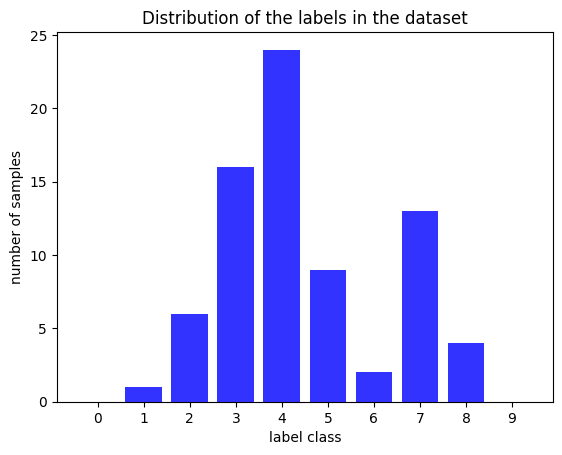

In [105]:
# Counting the number of samples for each label class
label_counts = np.bincount(y_labels.astype(int), minlength=10) # set minlength to 10 to ensure that the array covers all the labels between 0 and 9

# plot the bar plot to visualize the distribution of the labels
plt.figure()
plt.bar(np.arange(10), label_counts, alpha = 0.8, color = 'blue')
plt.xlabel("label class")
plt.ylabel("number of samples")
plt.xticks(np.arange(10))
plt.title("Distribution of the labels in the dataset")
plt.savefig("Distribution of the labels in the dataset")
plt.show()

#### Consider one-asset vs one target (production growth rate)

#### Experiment 3 - Graph-Based Extraction

In [106]:
def train_test_split_validation(X_train, y_train, seed=0):
    # Compute the length of data and train dataset size
    data_length = len(X_train)  # Obtain the total number of elements in the data
    train_size = int(0.8 * data_length)  # 80% of the data is used as the training set

    # Split the indices
    np.random.seed(seed)
    train_indices = np.random.choice(data_length, train_size, replace=False)  # Random indices for the training set
    test_indices = np.setdiff1d(np.arange(data_length), train_indices)  # Indices for the testing set

    # Split the data into training and testing sets based on indices
    X_train_1 = X_train[train_indices]
    y_train_1 = y_train[train_indices]
    X_test_1 = X_train[test_indices]
    y_test_1 = y_train[test_indices]

    return X_train_1, y_train_1, X_test_1, y_test_1

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_graph_based, y_labels, test_size=1)
X_train_scaled, X_test_scaled = X_train.values, X_test.values # Convert DataFrame to NumPy array

X_train_1, y_train_1, X_test_1, y_test_1  = train_test_split_validation(X_train_scaled, y_train, seed=10)

In [108]:
class KernelClassifier:
    def __init__(self, d=2, n_classifiers=10, max_epoch=1000, gaussian=False):
        self.d = d
        self.n_classifiers = n_classifiers
        self.max_epoch = max_epoch
        self.gaussian = gaussian
    
    def kernel(self, a, b):
        if self.gaussian:
            norm = np.sum(a**2, axis=1)[:, None] - 2 * (a @ b.T) + np.sum(b**2, axis=1)
            K = np.exp(-self.d * norm)
            return K
        return np.dot(a, b.T) ** self.d

    def train(self, train_X, train_y):
        if len(train_X) == 0:
            raise ValueError("Training set is empty.")
            
        alpha = np.zeros((self.n_classifiers, len(train_X)))
        train_errors = []
        y_prediction_last_epoch = []
        y_true_last_epoch = []
        K = self.kernel(train_X, train_X)
        for n in range(self.max_epoch):
            mistakes = 0
            y_prediction_last_epoch.clear()
            y_true_last_epoch.clear()
            for i in range(len(train_X)):
                y_true = int(train_y[i])
                y_pred = np.argmax(alpha @ K[i, :])
                if n == self.max_epoch - 1:
                    y_true_last_epoch.append(y_true)
                    y_prediction_last_epoch.append(y_pred)
                if y_pred != y_true:
                    alpha[y_pred][i] -= 1
                    alpha[y_true][i] += 1
                    mistakes += 1
            train_errors.append(100 * mistakes / len(train_X))
        return alpha, train_errors, y_prediction_last_epoch, y_true_last_epoch

    def test(self, alpha, train_X, test_X, test_y, confusion=False):
        K = self.kernel(train_X, test_X)
        y_preds = np.argmax(alpha @ K, axis=0)
        if confusion:
            confusion_matrix = np.zeros((self.n_classifiers, self.n_classifiers))
            np.add.at(confusion_matrix, (test_y.astype(int), y_preds.astype(int)), 1)
            confusion_matrix /= np.sum(confusion_matrix, axis=1, keepdims=True)
            np.fill_diagonal(confusion_matrix, 0)
            return confusion_matrix
        return np.sum(y_preds != test_y) / len(test_X) * 100, y_preds

    def model(self, train_X, train_y, test_X, test_y, confusion=False):
        alpha, train_errors, y_prediction_last_epoch, y_true_last_epoch = self.train(train_X, train_y)
        test_error, y_prediction_test = self.test(alpha, train_X, test_X, test_y, confusion=confusion)
        return train_errors[-1], test_error, y_prediction_last_epoch, y_true_last_epoch, y_prediction_test

    @staticmethod
    def train_test_split_validation(X_train, y_train, seed=0):
        data_length = len(X_train)
        train_size = int(0.8 * data_length)
        np.random.seed(seed)
        train_indices = np.random.choice(data_length, train_size, replace=False)
        test_indices = np.setdiff1d(np.arange(data_length), train_indices)
        X_train_1 = X_train[train_indices]
        y_train_1 = y_train[train_indices]
        X_test_1 = X_train[test_indices]
        y_test_1 = y_train[test_indices]
        return X_train_1, y_train_1, X_test_1, y_test_1

    def cross_validation(self, X_train, y_train, folds, seed=0):
        scores = []
        indices = np.arange(len(y_train))
        np.random.seed(seed)
        np.random.shuffle(indices)
        folds_indexes = np.array_split(indices, folds)

        for i in range(len(folds_indexes)):
            val_indexes = folds_indexes[i]
            train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

            X_train_i = X_train[train_indexes, :]
            y_train_i = y_train[train_indexes]

            X_val_i = X_train[val_indexes, :]
            y_val_i = y_train[val_indexes]

            alpha, train_errors, _, _ = self.train(X_train_i, y_train_i)
            val_err, _ = self.test(alpha, X_train_i, X_val_i, y_val_i)
            scores.append(val_err)

        return np.mean(scores)

    def cv(self, X_train, y_train, d_range, folds=5):
        scores = np.zeros((len(d_range),))

        for i, d in tqdm(enumerate(d_range), unit='kernel', total=len(d_range)):
            self.d = d
            scores[i] = self.cross_validation(X_train, y_train, folds)

        best_d = d_range[np.argmin(scores)]
        return best_d, min(scores)
best_d_list = []
best_scores_list = []
d_range = range(1, 8)

for n in range(20):
    print(f"Iteration {n}")
    X_train_cv, y_train_cv, X_test_cv, y_test_cv = KernelClassifier.train_test_split_validation(X_train_1, y_train_1 , seed=n)
    classifier = KernelClassifier()
    best_d, _ = classifier.cv(X_train_cv, y_train_cv, d_range)

    classifier.d = best_d
    train_error, test_error, _, _, _ = classifier.model(X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    
    best_d_list.append(best_d)
    best_scores_list.append(test_error)


Iteration 0


100%|██████████| 7/7 [00:06<00:00,  1.11kernel/s]


Iteration 1


100%|██████████| 7/7 [00:06<00:00,  1.10kernel/s]


Iteration 2


100%|██████████| 7/7 [00:06<00:00,  1.13kernel/s]


Iteration 3


100%|██████████| 7/7 [00:06<00:00,  1.15kernel/s]


Iteration 4


100%|██████████| 7/7 [00:06<00:00,  1.12kernel/s]


Iteration 5


100%|██████████| 7/7 [00:06<00:00,  1.10kernel/s]


Iteration 6


100%|██████████| 7/7 [00:06<00:00,  1.12kernel/s]


Iteration 7


100%|██████████| 7/7 [00:06<00:00,  1.11kernel/s]


Iteration 8


100%|██████████| 7/7 [00:06<00:00,  1.08kernel/s]


Iteration 9


100%|██████████| 7/7 [00:06<00:00,  1.11kernel/s]


Iteration 10


100%|██████████| 7/7 [00:06<00:00,  1.13kernel/s]


Iteration 11


100%|██████████| 7/7 [00:06<00:00,  1.12kernel/s]


Iteration 12


100%|██████████| 7/7 [00:06<00:00,  1.11kernel/s]


Iteration 13


100%|██████████| 7/7 [00:06<00:00,  1.10kernel/s]


Iteration 14


100%|██████████| 7/7 [00:06<00:00,  1.14kernel/s]


Iteration 15


100%|██████████| 7/7 [00:06<00:00,  1.16kernel/s]


Iteration 16


100%|██████████| 7/7 [00:06<00:00,  1.16kernel/s]


Iteration 17


100%|██████████| 7/7 [00:06<00:00,  1.16kernel/s]


Iteration 18


100%|██████████| 7/7 [00:06<00:00,  1.15kernel/s]


Iteration 19


100%|██████████| 7/7 [00:06<00:00,  1.16kernel/s]


In [109]:
# Creating a PrettyTable
table = PrettyTable()
table.field_names = ["Iteration", "Best d", "Test Error"]

# Populating the table with data
for run, (best_d, test_error) in enumerate(zip(best_d_list, best_scores_list), start=1):
    table.add_row([run, f"{best_d}", f"{test_error:.3f}%"])

# Printing the table
print(table)

+-----------+--------+------------+
| Iteration | Best d | Test Error |
+-----------+--------+------------+
|     1     |   6    |  75.000%   |
|     2     |   5    |  50.000%   |
|     3     |   5    |  83.333%   |
|     4     |   7    |  75.000%   |
|     5     |   4    |  91.667%   |
|     6     |   1    |  75.000%   |
|     7     |   2    |  83.333%   |
|     8     |   2    |  83.333%   |
|     9     |   2    |  75.000%   |
|     10    |   7    |  83.333%   |
|     11    |   7    |  91.667%   |
|     12    |   7    |  91.667%   |
|     13    |   7    |  66.667%   |
|     14    |   3    |  91.667%   |
|     15    |   2    |  83.333%   |
|     16    |   7    |  66.667%   |
|     17    |   7    |  91.667%   |
|     18    |   4    |  58.333%   |
|     19    |   6    |  58.333%   |
|     20    |   7    |  75.000%   |
+-----------+--------+------------+


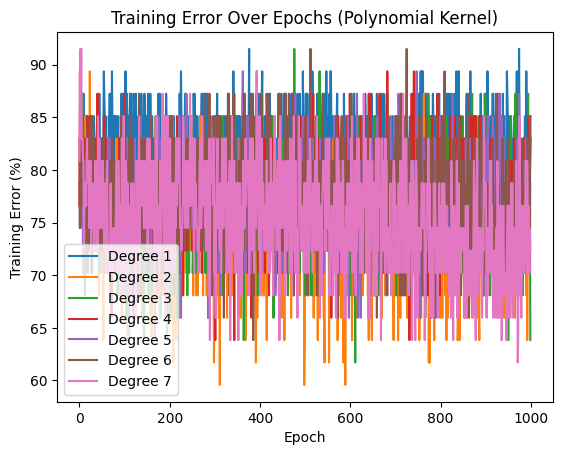

In [110]:
# Convergence check and visualization
plt.figure()
for d in range(1, 8):
    classifier = KernelClassifier(d=d, n_classifiers=10, max_epoch=1000, gaussian=False)
    X_train_2, y_train_2, X_test_2, y_test_2 = classifier.train_test_split_validation(X_train_1, y_train_1, seed=10)
    _, train_errors, _, _ = classifier.train(X_train_2, y_train_2)
    plt.plot(train_errors, label=f'Degree {d}')

plt.xlabel('Epoch')
plt.ylabel('Training Error (%)')
plt.title('Training Error Over Epochs (Polynomial Kernel)')
plt.legend()
#plt.savefig('Training_Error_Over_Epochs_Polynomial_Kernel.png')
plt.show()

#### Find the optimal parameter

In [111]:
n_its = 100  # Number of iterations
n_classifiers = 10  # Number of classifiers

train_errors = np.zeros((7, n_its))  # Matrix to store training errors
test_errors = np.zeros((7, n_its))  # Matrix to store testing errors

for d in range(1, 8):
    print('d =', d)  # Show the dimension of the kernel
    classifier = KernelClassifier(d=d, n_classifiers=n_classifiers, max_epoch=1000, gaussian=False)
    for n in tqdm(range(n_its), unit='Iteration'):  # Iterate specified number of times
        X_train_3, y_train_3, X_test_3, y_test_3 = classifier.train_test_split_validation(X_train_1, y_train_1, seed=d * n_its + n)
        _, test_error, _, _, _ = classifier.model(X_train_3, y_train_3, X_test_3, y_test_3)  # Unpack all returned values correctly
        train_error, _, _, _, _ = classifier.model(X_train_3, y_train_3, X_train_3, y_train_3)  # Use training data for both train and test parameters to calculate train error
        train_errors[d - 1, n] = train_error  # Store the training error
        test_errors[d - 1, n] = test_error  # Store the testing error

# Calculate mean and standard deviation for each dimension
train_mean = np.mean(train_errors, axis=1)
train_std = np.std(train_errors, axis=1)
test_mean = np.mean(test_errors, axis=1)
test_std = np.std(test_errors, axis=1)

# Create and print a PrettyTable
table = PrettyTable()
table.field_names = ["Kernel Dimension", "Train Error (Mean ± Std)", "Test Error (Mean ± Std)"]
for i in range(7):
    train_error_str = f"{train_mean[i]:.3f} ± {train_std[i]:.3f} %"
    test_error_str = f"{test_mean[i]:.3f} ± {test_std[i]:.3f} %"
    table.add_row([i + 1, train_error_str, test_error_str])

print(table)


d = 1


  0%|          | 0/100 [00:00<?, ?Iteration/s]

100%|██████████| 100/100 [00:45<00:00,  2.18Iteration/s]


d = 2


100%|██████████| 100/100 [00:43<00:00,  2.29Iteration/s]


d = 3


100%|██████████| 100/100 [00:43<00:00,  2.31Iteration/s]


d = 4


100%|██████████| 100/100 [00:42<00:00,  2.33Iteration/s]


d = 5


100%|██████████| 100/100 [00:43<00:00,  2.32Iteration/s]


d = 6


100%|██████████| 100/100 [00:42<00:00,  2.33Iteration/s]


d = 7


100%|██████████| 100/100 [00:42<00:00,  2.34Iteration/s]

+------------------+--------------------------+-------------------------+
| Kernel Dimension | Train Error (Mean ± Std) | Test Error (Mean ± Std) |
+------------------+--------------------------+-------------------------+
|        1         |     82.638 ± 5.321 %     |    85.000 ± 10.607 %    |
|        2         |     80.277 ± 5.490 %     |    81.000 ± 10.480 %    |
|        3         |     78.426 ± 6.167 %     |     85.250 ± 9.564 %    |
|        4         |     78.617 ± 5.736 %     |    83.667 ± 10.667 %    |
|        5         |     76.787 ± 5.781 %     |    82.833 ± 10.057 %    |
|        6         |     75.532 ± 6.785 %     |    81.667 ± 10.737 %    |
|        7         |     74.447 ± 6.111 %     |    82.333 ± 11.382 %    |
+------------------+--------------------------+-------------------------+


#### Compute the prediction based on the optimal parameter

Test Error: 100.0%


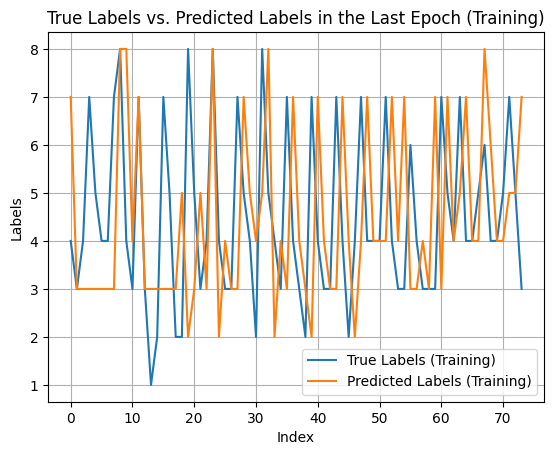

In [112]:
# Evaluate model performance on testing data
classifier = KernelClassifier(d=2, n_classifiers=10, max_epoch=2000, gaussian=False)
_, test_error, y_prediction_last_epoch, y_true_last_epoch, y_prediction_test = classifier.model(X_train, y_train, X_test, y_test)

print(f'Test Error: {test_error}%')

# Visualization of y_prediction and y_true as time-series data on the training set
plt.figure()
plt.plot(y_true_last_epoch, label='True Labels (Training)')
plt.plot(y_prediction_last_epoch, label='Predicted Labels (Training)')
plt.xlabel('Index')
plt.ylabel('Labels')
plt.title('True Labels vs. Predicted Labels in the Last Epoch (Training)')
plt.legend()
plt.grid(True)
plt.savefig('True_vs_Predicted_Labels_Last_Epoch_Training with Graph-Based Extraction.png')
plt.show()

In [120]:
def transform_from_classification(y_prediction_test):
    growth_rates = []
    for label in y_prediction_test:
        if label == 0:
            growth_rate = 0.8  # Custom handling for label 0
        elif label == 9:
            growth_rate = -0.8   # Custom handling for label 9
        else:
            growth_rate = (bins[label+1] + bins[label]) / 2  # Average the boundaries for other labels
        growth_rates.append(growth_rate)
    return growth_rates

# Test the function
predicted_growth_rates = transform_from_classification(y_prediction_test)
print(predicted_growth_rates)

[-0.07500000000000001]


Mean Squared Error: 0.0025092002123339205


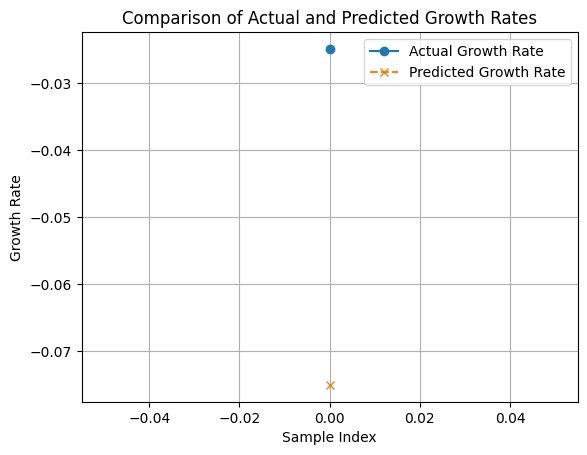

In [121]:
actual_growth_rates = selected_columns_df["net_sales_growth_rate"].iloc[-len(predicted_growth_rates):].reset_index(drop=True)

# Calculate Mean Squared Error between actual and predicted growth rates
mse = mean_squared_error(actual_growth_rates, predicted_growth_rates)
print(f"Mean Squared Error: {mse}")

# Optionally, visualize the comparison of predicted vs actual growth rates
import matplotlib.pyplot as plt

plt.figure()
plt.plot(actual_growth_rates, label='Actual Growth Rate', marker='o')
plt.plot(predicted_growth_rates, label='Predicted Growth Rate', linestyle='--', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Growth Rate')
plt.title('Comparison of Actual and Predicted Growth Rates')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
# Retrieve the last actual net sales value before the predictions start
initial_net_sales = selected_columns_df['net_sales'].iloc[-len(predicted_growth_rates) - 1]

# Initialize the list to store the predicted net sales
predicted_net_sales = []

# Compute the predicted net sales using the predicted growth rates
for i in range(len(predicted_growth_rates)):
    # Calculate the next predicted net sales based on the last true net sales and the growth rate
    last_true_net_sales = selected_columns_df['net_sales'].iloc[-len(predicted_growth_rates) + i - 1]
    next_predicted_sales = last_true_net_sales * (1 + predicted_growth_rates[i])
    predicted_net_sales.append(next_predicted_sales)

# Convert this list to a DataFrame for further analysis or visualization
predicted_net_sales_df = pd.DataFrame(predicted_net_sales, columns=['Predicted Net Sales'])


Mean Squared Error: 45177534382.50551


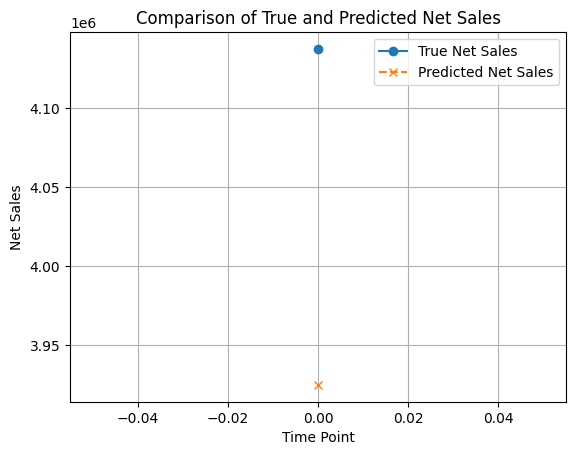

In [123]:
true_net_sales = selected_columns_df['net_sales'].iloc[-len(y_prediction_test):].reset_index(drop=True)

# Ensure that the predicted_net_sales_df and true_net_sales have the same length and are aligned
if len(predicted_net_sales_df) == len(true_net_sales):
    # Calculate Mean Squared Error
    mse = mean_squared_error(true_net_sales, predicted_net_sales_df['Predicted Net Sales'])
    print(f"Mean Squared Error: {mse}")
else:
    print("Error: The length of predicted and true net sales data does not match.")

# Optionally, you can visualize the comparison
plt.figure()
plt.plot(true_net_sales, label='True Net Sales', marker='o')
plt.plot(predicted_net_sales_df['Predicted Net Sales'], label='Predicted Net Sales', linestyle='--', marker='x')
plt.xlabel('Time Point')
plt.ylabel('Net Sales')
plt.title('Comparison of True and Predicted Net Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#### Random Classification Algorithm

In [124]:
# Function to generate random classification predictions
def random_classification_model(true_values_length):
    random_predictions = np.random.choice([0.1, -0.1], size=true_values_length, p=[0.5, 0.5])
    return random_predictions

# Generate random predictions
true_values_length = len(predicted_growth_rates)
random_predictions = random_classification_model(true_values_length)

# Print the random predictions as a baseline
print(f"Random baseline predictions (growth rates): {random_predictions}")

Random baseline predictions (growth rates): [0.1]


   Predicted Net Sales
0            4667521.1


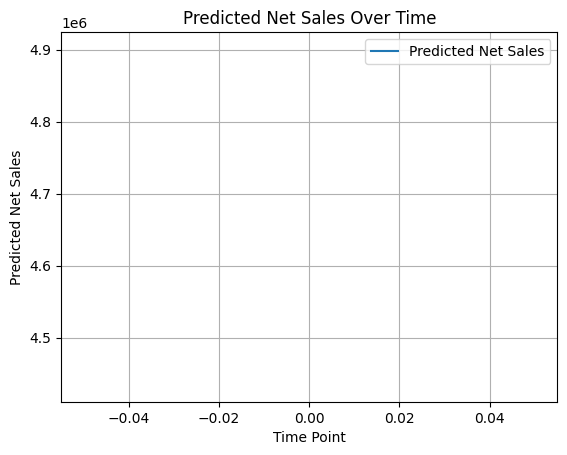

In [125]:
predicted_growth_rates = random_predictions

# Retrieve the last actual net sales value before the predictions start
initial_net_sales = selected_columns_df['net_sales'].iloc[-len(predicted_growth_rates) - 1]

# Initialize the list to store the predicted net sales
predicted_net_sales = []

# Compute the predicted net sales using the predicted growth rates
for i in range(len(predicted_growth_rates)):
    # Calculate the next predicted net sales based on the last true net sales and the growth rate
    last_true_net_sales = selected_columns_df['net_sales'].iloc[-len(predicted_growth_rates) + i - 1]
    next_predicted_sales = last_true_net_sales * (1 + predicted_growth_rates[i])
    predicted_net_sales.append(next_predicted_sales)

# Convert this list to a DataFrame for further analysis or visualization
predicted_net_sales_df = pd.DataFrame(predicted_net_sales, columns=['Predicted Net Sales'])

# Print the DataFrame to see the result
print(predicted_net_sales_df)

# Visualize the predicted net sales
plt.figure()
plt.plot(predicted_net_sales_df['Predicted Net Sales'], label='Predicted Net Sales')
plt.xlabel('Time Point')
plt.ylabel('Predicted Net Sales')
plt.title('Predicted Net Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 280910706102.0106


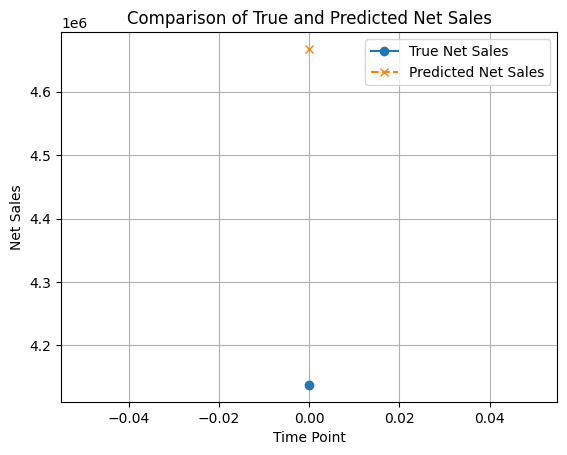

In [126]:
true_net_sales = selected_columns_df['net_sales'].iloc[-len(y_prediction_test):].reset_index(drop=True)

# Ensure that the predicted_net_sales_df and true_net_sales have the same length and are aligned
if len(predicted_net_sales_df) == len(true_net_sales):
    # Calculate Mean Squared Error
    mse = mean_squared_error(true_net_sales, predicted_net_sales_df['Predicted Net Sales'])
    print(f"Mean Squared Error: {mse}")
else:
    print("Error: The length of predicted and true net sales data does not match.")

# Optionally, you can visualize the comparison
plt.figure()
plt.plot(true_net_sales, label='True Net Sales', marker='o')
plt.plot(predicted_net_sales_df['Predicted Net Sales'], label='Predicted Net Sales', linestyle='--', marker='x')
plt.xlabel('Time Point')
plt.ylabel('Net Sales')
plt.title('Comparison of True and Predicted Net Sales')
plt.legend()
plt.grid(True)
plt.show()